<font style="font-size:28px;" align="left"><b> Measurements</b></font>
<br>
_prepared by Schrödinger Cats_
<br><br>
[<img src="../qworld/images/watch_lecture.jpg" align="left">](https://youtu.be/40xuWuwVgeA)
<br><br><br>

We will learn other types of measurements other than Homodyne measurement that we have used so far.

There are two other kinds of measurement that we can do on SF, these are the Heterodyne measurement and the photon counting measurement.

The measurement operators are used in the same manner as all other quantum transformation operations in Blackbird:

MeasurementOperator | (q[0], q[1], q[2], ...)

where the left-hand side represents the measurement operator (along with any required or optional arguments), and the right-hand side signifies the modes which are to be measured.

<br>
<font style="font-size:20px;" align="left"><b> Photon counting measurement </br>

Let's take a look at the photon counting measurement. Essentially, it counts how many photons are in the measured qumode. In SF, it is only supported in "fock" backend and not "gaussian backend". You can use "gaussian backend", but the state of the circuit will not be updated post-measurement.

In [1]:
#import necessary packages
import numpy as np
import strawberryfields as sf
from strawberryfields.ops import *
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [2]:
prog = sf.Program(1)

#use Fock backend, cutoff_dim will control how accurate is the simulation,
#the higher, the better

eng = sf.Engine("fock", backend_options={"cutoff_dim": 30})

#define the circuit
with prog.context as q:
    #initialize as vacuum
    Vac | q[0]
    #apply Dgate with parameter 3, this means shifting alpha by 3
    Dgate(3) | q[0]
    #the expected photon number is 3^2 = 9
    #apply photon counting
    MeasureFock() | q[0]

#number of runs
n = 5000

#declare an array to be filled with the photon counts
counts = np.zeros(n)

#run it n times
for i in range(n):
    results = eng.run(prog)
    counts[i] = results.samples

The expected value of the photon number of a coherent state is $|\alpha|^2$. Thus, here we expect it to be 9. How does the distribution look like?

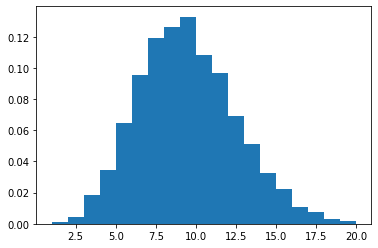

In [3]:
plt.hist(counts,bins=int(counts.max() - counts.min()),density=True)
plt.show()

We can try to calculate the mean and variance of the counts.

In [4]:
print(np.mean(counts))
print(np.var(counts))

8.9594
9.32135164


You can try to do it several times and see that the mean is very close to the variance, and it's close to our expected value, which is 9. This reminds us of a Poisson distribution! Well, does the histogram look like it? Let's try to generate the probability mass function of a Poisson distribution with mean 9 and superimpose it on our histogram, does it look very similar?

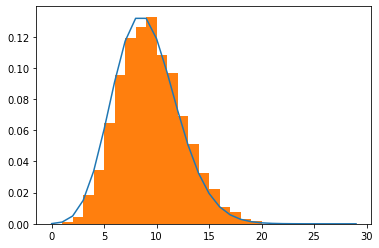

In [5]:
# creating a numpy array for x-axis
# using step size as 1
x = np.arange(0, 30, 1)
 
# poisson distribution data for y-axis
y = poisson.pmf(x, mu=9, loc=0)

# plotting the graph
plt.plot(x, y)
plt.hist(counts,bins=int(counts.max() - counts.min()),density=True)

# showing the graph
plt.show()

Indeed it matched really well with a Poisson distribution. You can in fact show that this is true in theory, but we won't do that here.

## Exercise 1

![Single-photon-on-a-beam-splitter.png](attachment:Single-photon-on-a-beam-splitter.png)

Remember the experiment described yesterday? Let's try to implement the experiment in SF.

You have seen that a displaced vacuum state does not have a definite number of photon (it is Poisson distributed). It turns out that the state of light that has a definite number of photon is called photon number state or Fock state. Let's try to see that

In [6]:
prog = sf.Program(1)

#use Fock backend, cutoff_dim will control how accurate is the simulation,
#the higher, the better

eng = sf.Engine("fock", backend_options={"cutoff_dim": 30})

#define the circuit
with prog.context as q:
    #initialize as Fock state
    Fock(2) | q[0]
    #apply photon counting
    MeasureFock() | q[0]

#number of runs
n = 100

#declare an array to be filled with the photon counts
counts = np.zeros(n)

#run it n times
for i in range(n):
    results = eng.run(prog)
    counts[i] = results.samples

In [7]:
print(counts)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]


Let's try to send a single photon though a 50/50 beamsplitter and detect the number of photons at each output.

In [8]:
#YOUR SOLUTION HERE

<br>
<font style="font-size:20px;" align="left"><b> Heterodyne measurement </br>

Another measurement that we can do is called a Heterodyne measurement. This is somewhat similar to a Homodyne measurement except now instead of measuring a single quadrature, you get the values of two orthogonal quadratures at the same time which is returned to you as a complex number (the real part is the X quadrature and the imaginary part is the P quadrature).

In [9]:
prog = sf.Program(1)
eng = sf.Engine("gaussian")

#define the circuit
with prog.context as q:
    #initialize as vacuum
    Vac | q[0]
    #apply Dgate with parameter 1, this means shifting alpha by 1
    Dgate(1) | q[0]
    #apply photon counting
    MeasureHeterodyne() | q[0]

results = eng.run(prog)
results.samples

array([[0.34069994-0.1693348j]])

You might wonder if the Heterodyne measurement can measure two quadratures at the same time, why don't we always use it? The answer is that, Heterodyne measurement is noisier compared to Homodyne measurement. How much noisier? Let's try to find it out.

In [10]:
prog = sf.Program(1)
eng = sf.Engine("gaussian")

#define the circuit
with prog.context as q:
    #initialize as vacuum
    Vac | q[0]
    #apply Dgate with parameter 1, this means shifting alpha by 1
    Dgate(1) | q[0]
    #apply photon counting
    MeasureHeterodyne() | q[0]

#number of runs
n = 5000

#declare an array to be filled with the photon counts
counts = np.zeros(n,dtype=complex)

#run it n times
for i in range(n):
    results = eng.run(prog)
    counts[i] = results.samples

#due to the units used by SF, we need to multiply by two to get x + i*p
counts = counts*2

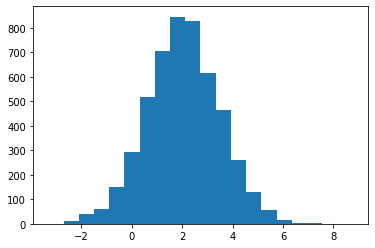

In [11]:
plt.hist(counts.real, bins=20)
plt.show()

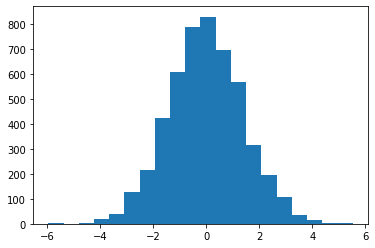

In [12]:
plt.hist(counts.imag, bins=20)
plt.show()

In [13]:
print("Variance of the X quadrature is",counts.real.var())
print("Variance of the P quadrature is",counts.imag.var())

Variance of the X quadrature is 2.0479989555760207
Variance of the P quadrature is 1.9679936292450282


In [14]:
prog = sf.Program(1)
eng = sf.Engine("gaussian")

#define the circuit
with prog.context as q:
    #initialize as vacuum
    Vac | q[0]
    #apply Dgate with parameter 1, this means shifting alpha by 1
    Dgate(1) | q[0]
    #apply photon counting
    MeasureHomodyne(0) | q[0]

#number of runs
n = 5000

#declare an array to be filled with the photon counts
countsX = np.zeros(n)

#run it n times
for i in range(n):
    results = eng.run(prog)
    countsX[i] = results.samples

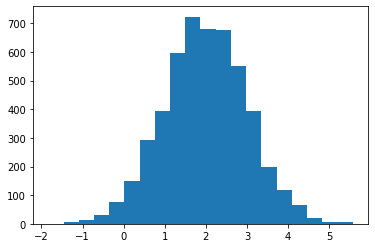

In [15]:
plt.hist(countsX, bins=20)
plt.show()

In [16]:
prog = sf.Program(1)
eng = sf.Engine("gaussian")

#define the circuit
with prog.context as q:
    #initialize as vacuum
    Vac | q[0]
    #apply Dgate with parameter 1, this means shifting alpha by 1
    Dgate(1) | q[0]
    #apply photon counting
    MeasureHomodyne(np.pi/2) | q[0]

#number of runs
n = 5000

#declare an array to be filled with the photon counts
countsP = np.zeros(n)

#run it n times
for i in range(n):
    results = eng.run(prog)
    countsP[i] = results.samples

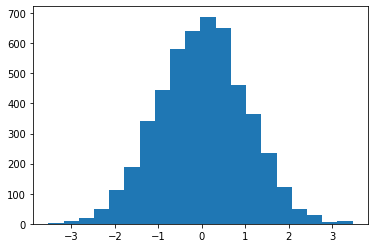

In [17]:
plt.hist(countsP, bins=20)
plt.show()

In [18]:
print("Variance of the X quadrature is",countsX.var())
print("Variance of the P quadrature is",countsP.var())

Variance of the X quadrature is 1.0143217789608119
Variance of the P quadrature is 1.015800683516209


As you can see, the variance of the quadratures measured by Heterodyne detection is twice the variance of the quadratures measured by the Homodyne detector. However, Heterodyne can simultaneously measure the X and P quadratures, whereas Homodyne can only measure one.

As you might have noticed, Homodyne measurement has a single parameter (which is the angle of the quadrature axis that we measure). Heterodyne measurement does not take this parameter and measure X and P quadrature (angle 0 and 90 degrees) by default. Is it possible to perform Heterodyne measurement at a different angle? In fact, this is a very easy thing to do. Can you think of a way to do it?

## Exercise 2

Write a code to perform Heterodyne measurement that measure both $x_{\pi/4}$ and $x_{3\pi/4}$ simultaneously on a squeezed state which has parameters r = 1 and $\phi = \pi/4$. Compute both variance of $x_{\pi/4}$ and $x_{3\pi/4}$ in 5000 tries.

In [19]:
#YOUR SOLUTION HERE

## Homodyne measurement of Fock state

As you have learned, Fock state is a state of definite number of photons. You might wonder how does the quadrature looks like? You can easily perform a Homodyne measurement to see it yourself.

In [ ]:
prog = sf.Program(1)

with prog.context as q:
    Fock(n=1) | q[0]
    MeasureHomodyne(phi=0) | q[0] #random 

eng = sf.Engine(backend='fock',backend_options={"cutoff_dim": 6})
n=10000
q=np.zeros(n)
for i in range(0,n):
    result=eng.run(prog)
    q[i]=result.samples[0][0]

In [ ]:
plt.hist(q,bins=100);